In [1]:
import pandas as pd

In [7]:
import json

with open('../0299-4DT9KF68TX-CGV5V64N1P.json') as data_file:
    data = json.load(data_file)

In [8]:
dict1 = [{
    'name': str(x['updatedRm']['index']) + '-' + str(x['updatedRm']['name']),
    'error': x['totalError'],
    'hf': x['hf'],
    'refHf': x['updatedRm']['datum'][0],
    'ie': x['ie'],
    'refIe': x['updatedRm']['datum'][2],
    'dipole': x['dipole'],
    'refDipole': x['updatedRm']['datum'][1],
    'geomError': x['geomGradMag']
} for x in data['results']]

In [9]:
df = pd.DataFrame(dict1);

In [10]:
df

,name,error,hf,refHf,ie,refIe,dipole,refDipole,geomError
0,0-H1,1512.268846,326.812099,365.7,-0.000000,0.0,0.000000e+00,0.0,0.00000
1,1-H1,0.390627,52.725002,52.1,11.885239,0.0,0.000000e+00,0.0,0.00000
2,2-H2,790.151848,-2.327904,0.0,15.801881,15.4,7.102019e-16,0.0,39.20668
3,3-C1,1757.458412,388.677948,430.6,18.695822,0.0,0.000000e+00,0.0,0.00000
4,4-C1,0.555406,170.154744,170.9,9.475822,0.0,0.000000e+00,0.0,0.00000
...,...,...,...,...,...,...,...,...,...
1201,1201-H6C7O4F6,98.320663,-450.584322,-460.5,12.531058,0.0,6.212359e+00,0.0,0.00000
1202,1202-C6F10,95.703473,-452.117185,-461.9,12.907537,0.0,7.210088e-01,0.0,0.00000
1203,1203-C5N1F11,50.137750,-471.819198,-478.9,14.131488,0.0,6.047175e-02,0.0,0.00000
1204,1204-C2N5F11,222.327139,-99.310638,-84.4,13.396985,0.0,1.291619e-01,0.0,0.00000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
dfsorted = df.sort_values(by='error')
dfsorted["bad"] = dfsorted.error / (dfsorted.hf - dfsorted.refHf).abs()
dfsorted

,name,error,hf,refHf,ie,refIe,dipole,refDipole,geomError,bad
893,893-H9C4N1O3,0.000179,-140.513364,-140.5,10.144521,0.00,1.755364e+00,0.00,0.000000,0.013364
903,903-H8C5O4,0.001088,-176.367022,-176.4,11.549435,0.00,1.893937e+00,0.00,0.000000,0.032978
859,859-H7C7N1O2,0.001300,-70.236053,-70.2,8.630960,0.00,3.460886e+00,0.00,0.000000,0.036053
971,971-H9C10N1O1,0.002643,24.551411,24.5,9.686293,0.00,2.992547e+00,0.00,0.000000,0.051411
689,689-H7C7N1O1,0.003309,-24.157523,-24.1,9.670795,0.00,3.517472e+00,0.00,0.000000,0.057523
...,...,...,...,...,...,...,...,...,...,...
1168,1168-C2N1F3,13419.464877,-118.432299,-118.4,15.010812,0.00,9.467326e-01,1.26,163.586119,415476.236011
1134,1134-O2F1,17787.640020,-55.386945,3.0,12.024399,0.00,5.395908e-03,0.00,169.579507,304.650980
711,711-O2,18726.634530,0.323142,22.0,10.798429,0.00,4.401473e-15,0.00,191.085051,863.899867
712,712-O2,19533.008004,-27.817831,0.0,12.011798,0.00,1.501008e-14,0.00,193.696548,702.175809


(array([1.204e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.66338121e-13, 1.58703506e+05, 3.17407013e+05, 4.76110519e+05,
        6.34814026e+05, 7.93517532e+05, 9.52221039e+05, 1.11092454e+06,
        1.26962805e+06, 1.42833156e+06, 1.58703506e+06]),
 <BarContainer object of 10 artists>)

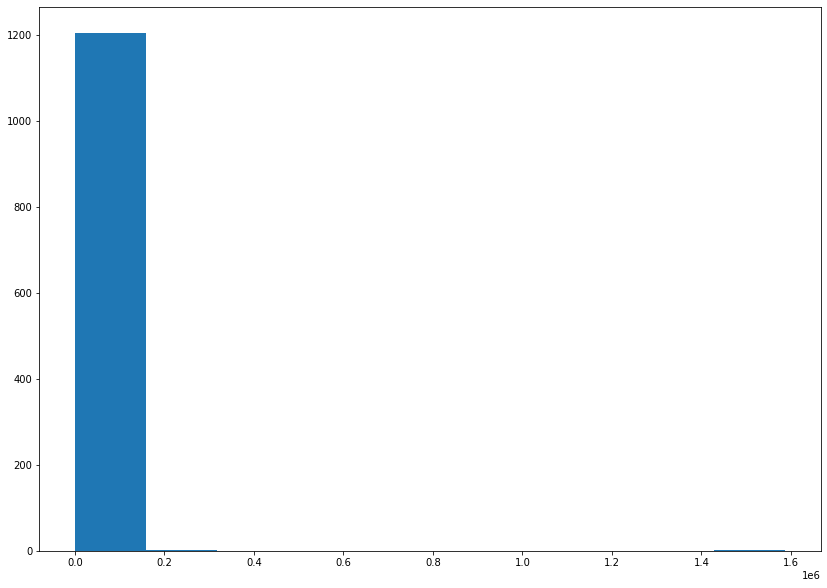

In [57]:
plt.figure(figsize=(14,10))
plt.hist(dfsorted.error / (dfsorted.hf - dfsorted.refHf).abs())

c:\users\billi\ideaprojects\mndoparam\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='error', ylabel='Density'>

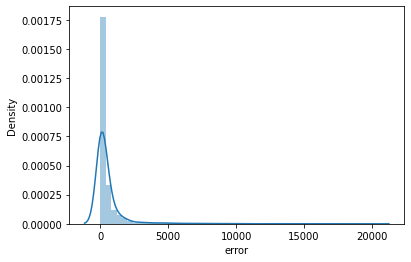

In [12]:
sns.distplot(dfsorted.error)

In [13]:
dfsorted.error.describe()

count     1206.000000
mean       556.940099
std       1584.418860
min          0.000179
25%         19.170115
50%        116.048943
75%        482.168120
max      20092.960484
Name: error, dtype: float64

c:\users\billi\ideaprojects\mndoparam\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='error', ylabel='Density'>

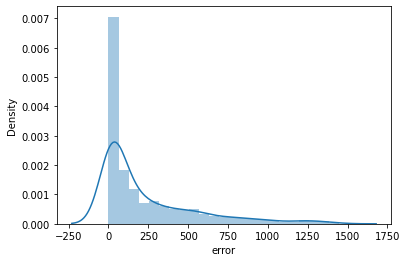

In [21]:
sns.distplot(dfsorted.error[0:-100])